# DATA VISUALIZATION - 2000 YEARS OF ECONOMIC HISTORY
**_All major powers compared by GDP from the year 1 to 2021 AD_**
___
## Background
This data visualization experiment was inspired by a [graph titled "2,000 Years of Economic History in One Chart", published by VisualCapitalist in 2017](/https://www.visualcapitalist.com/2000-years-economic-history-one-chart/). It seeks to correct the original's distorted x-axis which obscures the temporal characteristics (i.e. compressed duration) of Western economic dominance relative to Asia in the past 2000 years of recorded data.

Additionally, the graph has been updated to include 2021 GDP (PPP) data. Feel free to update and disseminate it as new data becomes available.

Any questions and comments may be directed to the original author on Twitter ([@BRIFuturist](\https://twitter.com/BRIFuturist))

## Notes
1. GDP data from 1 - 2008 (denominated in 1990 int. US\$) retrieved from the [database](\https://www.rug.nl/ggdc/historicaldevelopment/maddison/releases/maddison-database-2010) of "Statistics on World Population, GDP, and Per Capita GDP, 1-2008 AD". Angus Maddison: IMF. 
2. GDP data from 2021 (denominated in 2021 int. US\$) retrieved from [World Bank](/https://data.worldbank.org/indicator/NY.GDP.MKTP.PP.CD).
3. While two different types of international dollars are used to construct the plot data, the comparison should still be generally valid since what is being calculated is each subject's relative share of GDP expressed as a percentage.
4. The 2021 GDP comparison has notable absences due to lack of data. These include South America (Brazil, etc.), Oceania, and Africa. The 11 countries being evaluated represents ~100 trillion of the ~150 trillion world economy.

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/">Creative Commons Attribution-ShareAlike 4.0 International License</a>.

<a rel="license" href="http://creativecommons.org/licenses/by-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png" /></a><br /> 

## Relative GDP of world powers

### Data preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import vertical spreadsheet version of "Statistics on World Population, GDP, and Per Capita GDP, 1-2008 AD".
# Listed as "Maddison Database 2010".
df = pd.read_excel('md2010_vertical.xlsx', sheet_name='GDP')

In [3]:
# Preview dataframe
df.head(100)

,GDP,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 173,Unnamed: 174,Unnamed: 175,Unnamed: 176,Unnamed: 177,Unnamed: 178,Unnamed: 179,Unnamed: 180,Unnamed: 181,Unnamed: 182
0,(1990 Int. GK$),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Austria,Belgium,Denmark,Finland,France,Germany,Italy,Netherlands,Norway,...,Togo,Tunisia,Uganda,Zaire (Congo-Kinshasa),Zambia,Zimbabwe,3 Small Afr.,Total Africa,NaN,World Total
2,1,212.5,135,72,8,2366,1225,6475,85,40,...,NaN,440,NaN,NaN,NaN,NaN,NaN,8030,NaN,105402
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000,297.5,170,144,16,2763,1435,2250,127.5,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13720,NaN,121208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1903,18127.623,26395.152,8729.16,4561.746,115446.711,171353.704,65196.220581,19197,4327.734855,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,1904,18409.035,27074.439,8915.88,4734.249,116313.645,178236.332,65805.249511,19334,4335.958397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,1905,19440.879,27850.767,9067.59,4810.917,118336.491,182033.644,69477.012158,19953,4368.852563,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,1906,20191.311,28433.013,9324.33,5002.587,120503.826,187492.28,72087.402768,20661,4550.001046,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Data exploration
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Columns: 183 entries, GDP to Unnamed: 182
dtypes: float64(1), object(182)
memory usage: 287.5+ KB


In [5]:
# Set headers to 2nd row containing country names
df = df.rename(columns=df.iloc[1])
# Drop first two rows
df = df.drop(df.index[0:2])
# Rename first column to "Year"
df = df.rename(columns={df.columns[0]:'Year'})

In [6]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# Drop single NaN column
df = df[df.columns.dropna()]
# Drop rows containing only NaN
df.dropna(axis=0, how='all', inplace=True)

In [7]:
# View updated dataframe
df.head()

,Year,Austria,Belgium,Denmark,Finland,France,Germany,Italy,Netherlands,Norway,...,Tanzania,Togo,Tunisia,Uganda,Zaire (Congo-Kinshasa),Zambia,Zimbabwe,3 Small Afr.,Total Africa,World Total
2,1,212.5,135,72,8,2366,1225,6475,85,40,...,NaN,NaN,440,NaN,NaN,NaN,NaN,NaN,8030,105402
4,1000,297.5,170,144,16,2763,1435,2250,127.5,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13720,121208
6,1500,1414,1225,443,136,10912,8256,11550,723,183,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19283,248321
8,1600,2093,1561,569,215,15559,12656,14410,2072,266,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23349,331344
10,1700,2483,2288,727,255,19539,13650,14630,4047,361,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25692,371058


In [8]:
# Baseline years are selected based on completeness of data
years = [1, 1000, 1500, 1600, 1700, 1820, 1870, 1900]

# From 1950-2008, GDP data becomes fully complete for target countries
years.extend(range(1950,2009))

In [9]:
countries = ['China', 'India', 'Japan', 'F. USSR', 'Germany', 'Italy', 'Spain', 
             'France', 'UK', 'USA', 'Iran', 'Iraq', 'Turkey']

In [10]:
df = df[ df['Year'].isin(years)]

In [11]:
# Set index to "Year" column
df.set_index('Year', inplace=True)

/opt/homebrew/Caskroom/miniconda/base/envs/playground/lib/python3.10/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [12]:
df = df[countries]

In [13]:
# 2022 GDP data (GDP PPP 2022 International $, in millions) manually retrieved from World Bank (https://data.worldbank.org/indicator/NY.GDP.MKTP.PP.CD)
gdp_2022 = {'China': 27312548, 'India': 10218572, 'Japan': 5396818, 'F. USSR': 4785445,
           'Germany':4815479, 'Italy':2713266, 'Spain':1929758, 'France':3424152, 
            'UK': 3344467, 'USA': 22996100, 'Iran': 1326346, 'Iraq': 428633, 'Turkey':2591455}
gdp_2022_df = pd.DataFrame([gdp_2022], index=[2022], columns=countries)

In [14]:
# This row is included for display purposes ONLY. Due to the very large timescale
# and how matplotlib renders graphs, the right edge gets cut off and visibility is lost
# This row helps the 2022 data become more visible.
gdp_2040_df = pd.DataFrame([gdp_2022], index=[2040], columns=countries)

In [15]:
# Add 2022 and 2050 rows to dataframe. 
df = pd.concat([df, gdp_2022_df, gdp_2040_df])

In [16]:
df.tail()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,Iran,Iraq,Turkey
2006,7928475,2909356,2858859,1955941,1651794,1150914,763330,1387394,1400488,9253034,414005,26634,578728
2007,8306661,3182835,2924613,2127937,1693088,1169329,790809,1419304,1436901,9447347,446297,27034,605928
2008,8908894,3415183,2904141,2242206,1713405,1157636,797927,1423562,1446959,9485136,457455,29602,611382
2022,27312548,10218572,5396818,4785445,4815479,2713266,1929758,3424152,3344467,22996100,1326346,428633,2591455
2040,27312548,10218572,5396818,4785445,4815479,2713266,1929758,3424152,3344467,22996100,1326346,428633,2591455


In [17]:
# The following countries are selected from dataset based on availability of data from 1 AD
middle_east_countries = ['Iran', 'Iraq', 'Turkey']

In [18]:
# Create new column that represents sum of individual "Middle East" countries
df['Middle East (Iran, Iraq, Turkey)'] = df[middle_east_countries].sum(axis=1)

In [19]:
# Original constituents of "Middle East" category no longer needed
df.drop(middle_east_countries, axis=1, inplace=True)

In [20]:
# Add 'Total GDP' column to allow for conversion to percentages
df['Total GDP'] = df.apply(np.sum, axis=1)

In [21]:
df.head()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,"Middle East (Iran, Iraq, Turkey)",Total GDP
1,26820,33750,1200,1560,1225,6475,1867,2366,320,272,6900.0,82755.0
1000,27494,33750,3188,2840,1435,2250,1800,2763,800,520,8425.0,85265.0
1500,61800,60500,7700,8458,8256,11550,4495,10912,2815,800,6730.0,184016.0
1600,96000,74250,9620,11426,12656,14410,7029,15559,6007,600,4740.0,252297.0
1700,82800,90750,15390,16196,13650,14630,7481,19539,10709,527,8590.0,280262.0


In [22]:
countries = ['China', 'Japan', 'India', 'Middle East (Iran, Iraq, Turkey)', 'F. USSR', 'Italy', 'France', 'Germany', 'Spain', 'UK', 'USA']

In [23]:
# There is a gap in the "Middle East" data in the year 1900. To prevent this
# from ruining the graph, I decided to estimate the value using the midpoint of
# the 1820 and 1950 values
middle_east_midpoint_1820_1950 = (df.loc[1820, df.columns[-2]] + df.loc[1950, df.columns[-2]]) / 2
# Replace NaN with estimated 1900 value
df.loc[1900, df.columns[-2]] = middle_east_midpoint_1820_1950

In [24]:
# To preserve the graph proportions, add the 1900 estimate value to the 1900 total GDP value
df.loc[1900, df.columns[-1]] = df.loc[1900, df.columns[-1]] + middle_east_midpoint_1820_1950

In [25]:
# Replace all values with ratio relative to total GDP for that year
df[countries] = df[countries].div(df['Total GDP'], axis=0)

In [26]:
df.head()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,"Middle East (Iran, Iraq, Turkey)",Total GDP
1,0.324089,0.40783,0.014501,0.018851,0.014803,0.078243,0.022561,0.02859,0.003867,0.003287,0.083379,82755.0
1000,0.322454,0.395825,0.037389,0.033308,0.01683,0.026388,0.021111,0.032405,0.009383,0.006099,0.098810,85265.0
1500,0.33584,0.328776,0.041844,0.045963,0.044866,0.062766,0.024427,0.059299,0.015298,0.004347,0.036573,184016.0
1600,0.380504,0.294296,0.03813,0.045288,0.050163,0.057115,0.02786,0.061669,0.023809,0.002378,0.018787,252297.0
1700,0.295438,0.323804,0.054913,0.057789,0.048704,0.052201,0.026693,0.069717,0.038211,0.00188,0.030650,280262.0


In [27]:
# Multiply all values by 100 to allow representation as percentage
df = df.mul(100)

In [28]:
df.head(20)

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,"Middle East (Iran, Iraq, Turkey)",Total GDP
1,32.408918,40.783034,1.450063,1.885082,1.480273,7.824301,2.256057,2.859042,0.386684,0.328681,8.337865,8.275500e+06
1000,32.245353,39.582478,3.738932,3.330792,1.682988,2.638832,2.111066,3.240486,0.938251,0.609863,9.880959,8.526500e+06
1500,33.584036,32.877576,4.184419,4.596339,4.486566,6.276628,2.442722,5.929919,1.529758,0.434745,3.657291,1.840160e+07
1600,38.050393,29.429601,3.812966,4.528789,5.01631,5.711523,2.786002,6.166938,2.380924,0.237815,1.878738,2.522970e+07
1700,29.543784,32.380415,5.49129,5.778878,4.870443,5.220115,2.669288,6.971691,3.821067,0.188038,3.064989,2.802620e+07
1820,41.165973,20.06382,3.734651,6.785002,4.829529,4.058072,2.214787,6.387029,6.524609,2.259627,1.976903,5.553130e+07
1870,22.198341,15.780313,2.970815,9.786036,8.440953,4.891965,2.287924,8.43523,11.720362,11.509116,1.978945,8.547486e+07
1900,14.498928,11.329493,3.457353,10.238388,10.789097,3.995265,2.204142,7.759234,12.286186,20.769297,2.672618,1.504622e+08
1950,6.578789,5.967515,4.322556,13.701986,7.125775,4.42973,1.649605,5.921058,9.34111,39.096942,1.864934,3.723862e+08
1951,6.907709,5.737527,4.568204,12.93471,7.31011,4.473496,1.704209,5.906906,9.040109,39.53812,1.878900,3.962718e+08


### Data visualization

In [29]:
# Configure Seaborn
sns.set_theme()
sns.set(rc = {'figure.figsize':(22,16)})

In [30]:
# Country colors for stackplot
colors = ['#C0392B', '#F4D03F', '#FB8C00', '#F0B27A', '#E74C3C', '#2E4053', '#2980B9', '#AF7AC5', '#48C9B0', '#0D47A1', '#7D3C98']

In [31]:
cmap = sns.color_palette(colors)
sns.set_palette(cmap, n_colors=12)

In [32]:
countries_labels = ['China', 'Japan', 'India', 'Middle East \n(Iran, Iraq, Turkey)', 'Russia', 'Italy', 'France', 'Germany', 'Spain', 'UK', 'USA']

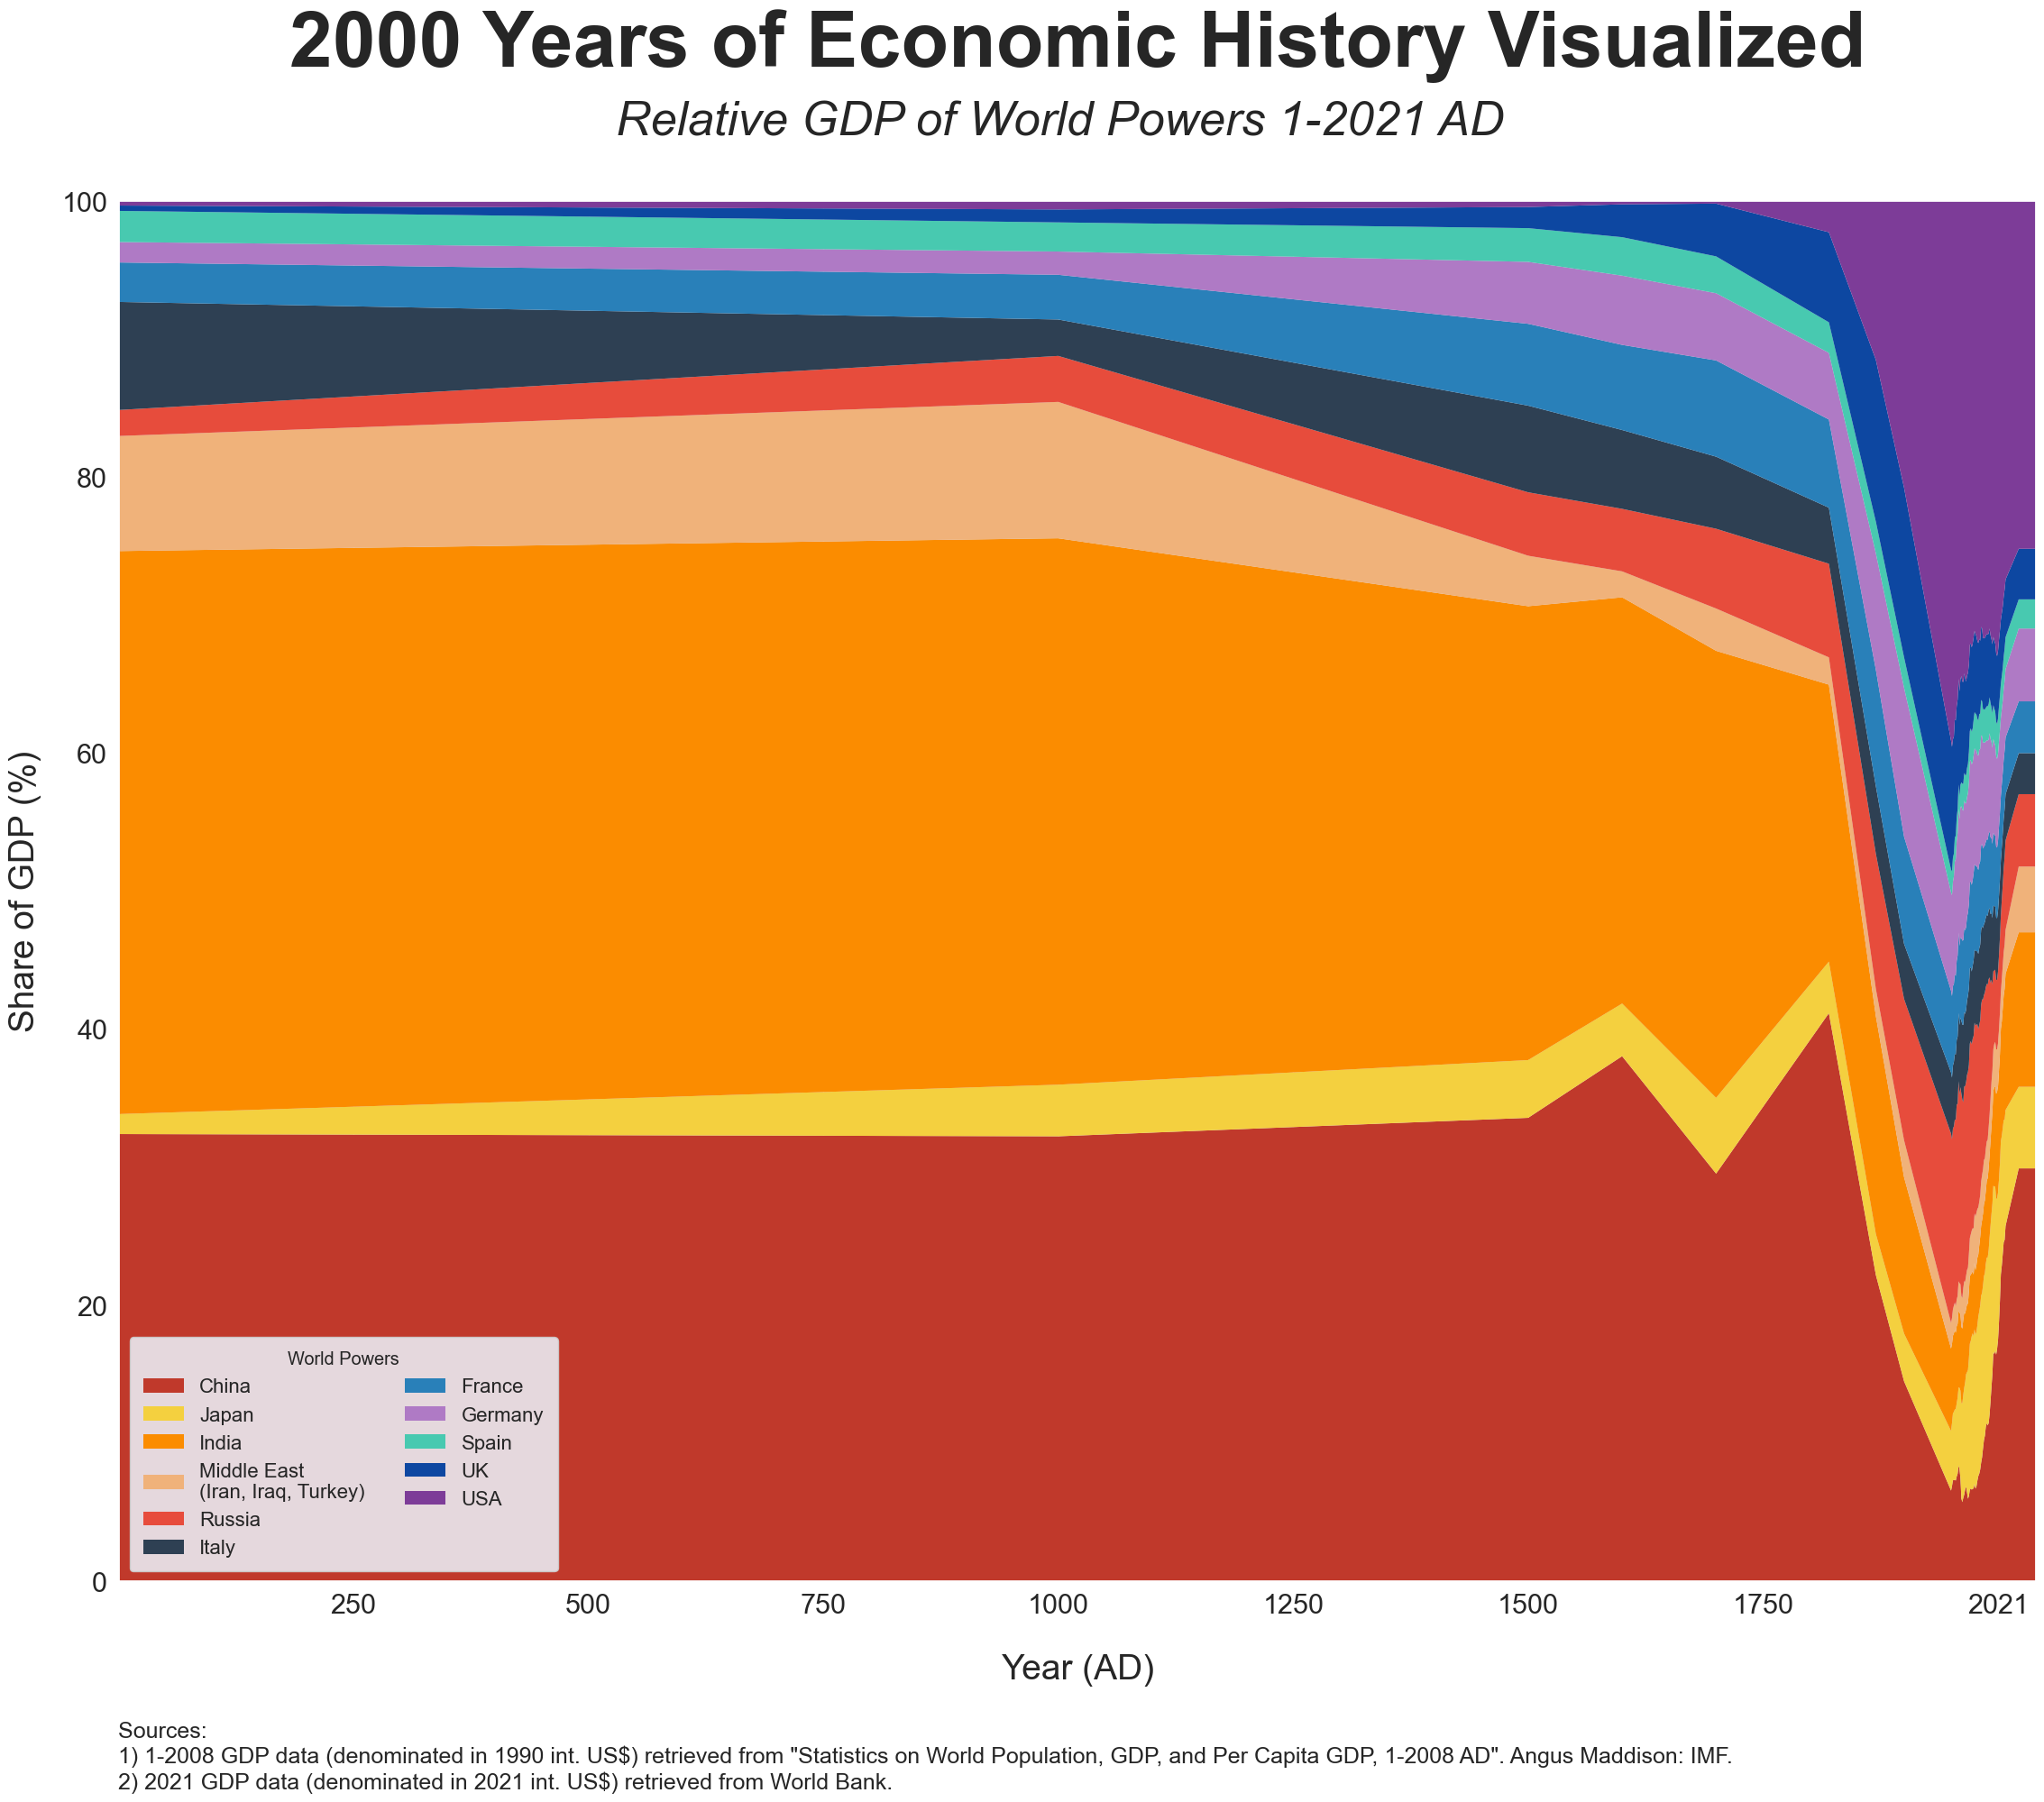

In [33]:
plt.stackplot(df.index, df[countries].T.astype(float),labels=countries_labels, edgecolor='none')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.xlabel("Year (AD)", fontsize=28,labelpad=28, fontweight='roman')
plt.ylabel("Share of GDP (%)", labelpad=16, fontsize=28, fontweight='roman')
plt.xticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000], [250, 500, 750, 1000, 1250, 1500, 1750, 2021], fontsize=22)
plt.yticks(fontsize=22)
plt.title("2000 Years of Economic History Visualized", fontsize=62, fontweight='semibold', pad=108)
plt.suptitle('Relative GDP of World Powers 1-2021 AD', fontsize=38, y= 1.055, style='italic')
plt.legend(loc='lower left', prop={'size': 16}, ncol=2, borderpad=0.7, framealpha=0.90, title="World Powers", title_fontsize='large')
plt.text(0, -15, "Sources: \n1) 1-2008 GDP data (denominated in 1990 int. US$) retrieved from \"Statistics on World Population, GDP, and Per Capita GDP, 1-2008 AD\". Angus Maddison: IMF.\n2) 2021 GDP data (denominated in 2021 int. US$) retrieved from World Bank.", fontsize=18)
plt.savefig('relative_gdp_1-2000.png', bbox_inches='tight', pad_inches=0.8)
plt.show()

In [34]:
# Alternative version with title and legend removed
#
# plt.stackplot(df.index, df[countries].T.astype(float),labels=countries_labels, edgecolor='none')
# plt.margins(x=0, y=0)
# plt.xlabel("Year (AD)", fontsize=28,labelpad=28, fontweight='roman')
# plt.ylabel("Relative GDP (%)", labelpad=16, fontsize=28, fontweight='roman')
# plt.xticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000], [250, 500, 750, 1000, 1250, 1500, 1750, 2021], fontsize=22)
# plt.yticks(fontsize=22)
# plt.savefig('relative_gdp_1-2000.png', bbox_inches='tight', pad_inches=0.8)
# plt.show()

## Relative population of world powers

In [35]:
df = pd.read_excel('md2010_vertical.xlsx', sheet_name='Population')

In [36]:
# Set headers to 2nd row containing country names
df = df.rename(columns=df.iloc[1])
# Drop first two rows
df = df.drop(df.index[0:2])
# Rename first column to "Year"
df = df.rename(columns={df.columns[0]:'Year'})

In [37]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()
# Drop single NaN column
df = df[df.columns.dropna()]
# Drop rows containing only NaN
df.dropna(axis=0, how='all', inplace=True)

In [38]:
# View updated dataframe
df.head()

,Year,Austria,Belgium,Denmark,Finland,France,Germany,Italy,Netherlands,Norway,...,Tanzania,Togo,Tunisia,Uganda,Zaire (Congo-Kinshasa),Zambia,Zimbabwe,3 Small Afr.,Total Africa,World Total
2,1,500,300,180,20,5000,3000,8000,200,100,...,NaN,NaN,800,NaN,NaN,NaN,NaN,NaN,17000,225820
4,1000,700,400,360,40,6500,3500,5000,300,200,...,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,32300,267330
6,1500,2000,1400,600,300,15000,12000,10500,950,300,...,NaN,NaN,800,NaN,NaN,NaN,NaN,NaN,46610,438428
8,1600,2500,1600,650,400,18500,16000,13100,1500,400,...,NaN,NaN,1000,NaN,NaN,NaN,NaN,NaN,55320,556148
10,1700,2500,2000,700,400,21471,15000,13300,1900,500,...,NaN,NaN,800,NaN,NaN,NaN,NaN,NaN,61080,603490


In [39]:
# Baseline years are selected based on completeness of data
years = [1, 1000, 1500, 1600, 1700, 1820, 1870, 1900]

# From 1950-2008, GDP data becomes fully complete for target countries
years.extend(range(1950,2009))

In [40]:
countries = ['China', 'India', 'Japan', 'F. USSR', 'Germany', 'Italy', 'Spain', 
             'France', 'UK', 'USA', 'Iran', 'Iraq', 'Turkey']

In [41]:
df = df[ df['Year'].isin(years)]

In [42]:
# Set index to "Year" column
df.set_index('Year', inplace=True)

/opt/homebrew/Caskroom/miniconda/base/envs/playground/lib/python3.10/site-packages/pandas/core/indexes/base.py:6999: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  return Index(sequences[0], name=names)


In [43]:
df = df[countries]

In [44]:
df.tail()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,Iran,Iraq,Turkey
Year,,,,,,,,,,,,,
2004,1296075,1065070.607,127480,285713.254,82424.609,58057.477,40280.78,62534,60270.708,292806,64326.188,25374.691,71613.543
2005,1303720,1093563,127537,285131.177,82431.39,58103.033,40341.462,62912,60441.457,295583,64737.226,26074.906,72673.81
2006,1311020,1111714,127515,284598.961,82422.299,58133.509,40397.842,63293,60609.153,298442,65025.373,26783.383,73726.124
2007,1317885,1129866,127433,284119.892,82400.996,58147.733,40448.191,63682,60776.238,301280,65397.521,27499.638,74767.836
2008,1324786,1147996,127288,283685.062,82369.548,58145.321,40491.051,64058,60943.912,304228,65875.223,28221.181,75793.836


In [45]:
# 2022 population data manually retrieved from World Bank
population_2021 = {'China': 1412360, 'India': 1393409, 'Japan': 125682, 'F. USSR': 143446,
           'Germany':83129, 'Italy':59066, 'Spain':47326, 'France':67499, 
            'UK': 67326, 'USA': 331894, 'Iran': 85029, 'Iraq': 41179, 'Turkey':85043}
population_2021_df = pd.DataFrame([population_2021], index=[2021], columns=countries)

In [46]:
# This row is included for display purposes ONLY. Due to the very large timescale
# and how matplotlib renders graphs, the right edge gets cut off and visibility is lost
# This row helps the 2022 data become more visible.
population_2040_df = pd.DataFrame([population_2021], index=[2040], columns=countries)

In [47]:
# Add 2022 and 2050 rows to dataframe. 
df = pd.concat([df, population_2021_df, population_2040_df])

In [48]:
df.tail()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,Iran,Iraq,Turkey
2006,1311020,1111714,127515,284598.961,82422.299,58133.509,40397.842,63293,60609.153,298442,65025.373,26783.383,73726.124
2007,1317885,1129866,127433,284119.892,82400.996,58147.733,40448.191,63682,60776.238,301280,65397.521,27499.638,74767.836
2008,1324786,1147996,127288,283685.062,82369.548,58145.321,40491.051,64058,60943.912,304228,65875.223,28221.181,75793.836
2021,1412360,1393409,125682,143446,83129,59066,47326,67499,67326,331894,85029,41179,85043
2040,1412360,1393409,125682,143446,83129,59066,47326,67499,67326,331894,85029,41179,85043


In [49]:
# The following countries are selected from dataset based on availability of data from 1 AD
middle_east_countries = ['Iran', 'Iraq', 'Turkey']

In [50]:
# Create new column that represents sum of individual "Middle East" countries
df['Middle East (Iran, Iraq, Turkey)'] = df[middle_east_countries].sum(axis=1)

In [51]:
# Original constituents of "Middle East" category no longer needed
df.drop(middle_east_countries, axis=1, inplace=True)

In [52]:
# Add 'Total GDP' column to allow for conversion to percentages
df['Total Population'] = df.apply(np.sum, axis=1)

In [53]:
df.tail()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,"Middle East (Iran, Iraq, Turkey)",Total Population
2006,1311020,1111714,127515,284598.961,82422.299,58133.509,40397.842,63293,60609.153,298442,165534.880,3603680.644
2007,1317885,1129866,127433,284119.892,82400.996,58147.733,40448.191,63682,60776.238,301280,167664.995,3633704.045
2008,1324786,1147996,127288,283685.062,82369.548,58145.321,40491.051,64058,60943.912,304228,169890.240,3663881.134
2021,1412360,1393409,125682,143446,83129,59066,47326,67499,67326,331894,211251.000,3942388.000
2040,1412360,1393409,125682,143446,83129,59066,47326,67499,67326,331894,211251.000,3942388.000


In [54]:
countries = ['China', 'Japan', 'India', 'Middle East (Iran, Iraq, Turkey)', 'F. USSR', 'Italy', 'France', 'Germany', 'Spain', 'UK', 'USA']

In [55]:
# To preserve the graph proportions, add the 1900 estimate value to the 1900 total GDP value
# df.loc[1900, df.columns[-1]] = df.loc[1900, df.columns[-1]] + middle_east_midpoint_1820_1950

In [56]:
# Replace all values with ratio relative to total GDP for that year
df[countries] = df[countries].div(df['Total Population'], axis=0)

In [57]:
df.head()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,"Middle East (Iran, Iraq, Turkey)",Total Population
1,0.339157,0.426791,0.017072,0.022193,0.017072,0.045524,0.02134,0.028453,0.004552,0.00387,0.073977,175730.0
1000,0.319957,0.406725,0.040672,0.038503,0.01898,0.027115,0.021692,0.035249,0.010846,0.00705,0.073210,184400.0
1500,0.335623,0.358432,0.050181,0.055231,0.039102,0.034214,0.022158,0.048877,0.012845,0.006517,0.036821,306892.0
1600,0.388482,0.327781,0.044918,0.05026,0.038848,0.031807,0.020007,0.044918,0.014981,0.003642,0.034356,411860.0
1700,0.314311,0.375806,0.061496,0.060471,0.034164,0.030292,0.019975,0.048903,0.019508,0.002278,0.032798,439056.0


In [58]:
# Multiply all values by 100 to allow representation as percentage
df = df.mul(100)

In [59]:
df.head()

,China,India,Japan,F. USSR,Germany,Italy,Spain,France,UK,USA,"Middle East (Iran, Iraq, Turkey)",Total Population
1,33.915666,42.67911,1.707164,2.219314,1.707164,4.552438,2.133955,2.845274,0.455244,0.386957,7.397712,17573000.0
1000,31.995662,40.672451,4.067245,3.850325,1.898048,2.711497,2.169197,3.524946,1.084599,0.704989,7.321041,18440000.0
1500,33.562296,35.843228,5.018052,5.523116,3.91017,3.421399,2.215763,4.887713,1.284491,0.651695,3.682077,30689200.0
1600,38.848152,32.778128,4.491818,5.02598,3.884815,3.180692,2.00068,4.491818,1.498082,0.364201,3.435633,41186000.0
1700,31.43107,37.580628,6.149557,6.047065,3.416421,3.029226,1.997467,4.890265,1.950776,0.227761,3.279764,43905600.0


### Data visualization

In [60]:
# Country colors for stackplot
colors = ['#C0392B', '#F4D03F', '#FB8C00', '#F0B27A', '#E74C3C', '#2E4053', '#2980B9', '#AF7AC5', '#48C9B0', '#0D47A1', '#7D3C98']

In [61]:
cmap = sns.color_palette(colors)
sns.set_palette(cmap, n_colors=12)

In [62]:
countries_labels = ['China', 'Japan', 'India', 'Middle East \n(Iran, Iraq, Turkey)', 'Russia', 'Italy', 'France', 'Germany', 'Spain', 'UK', 'USA']

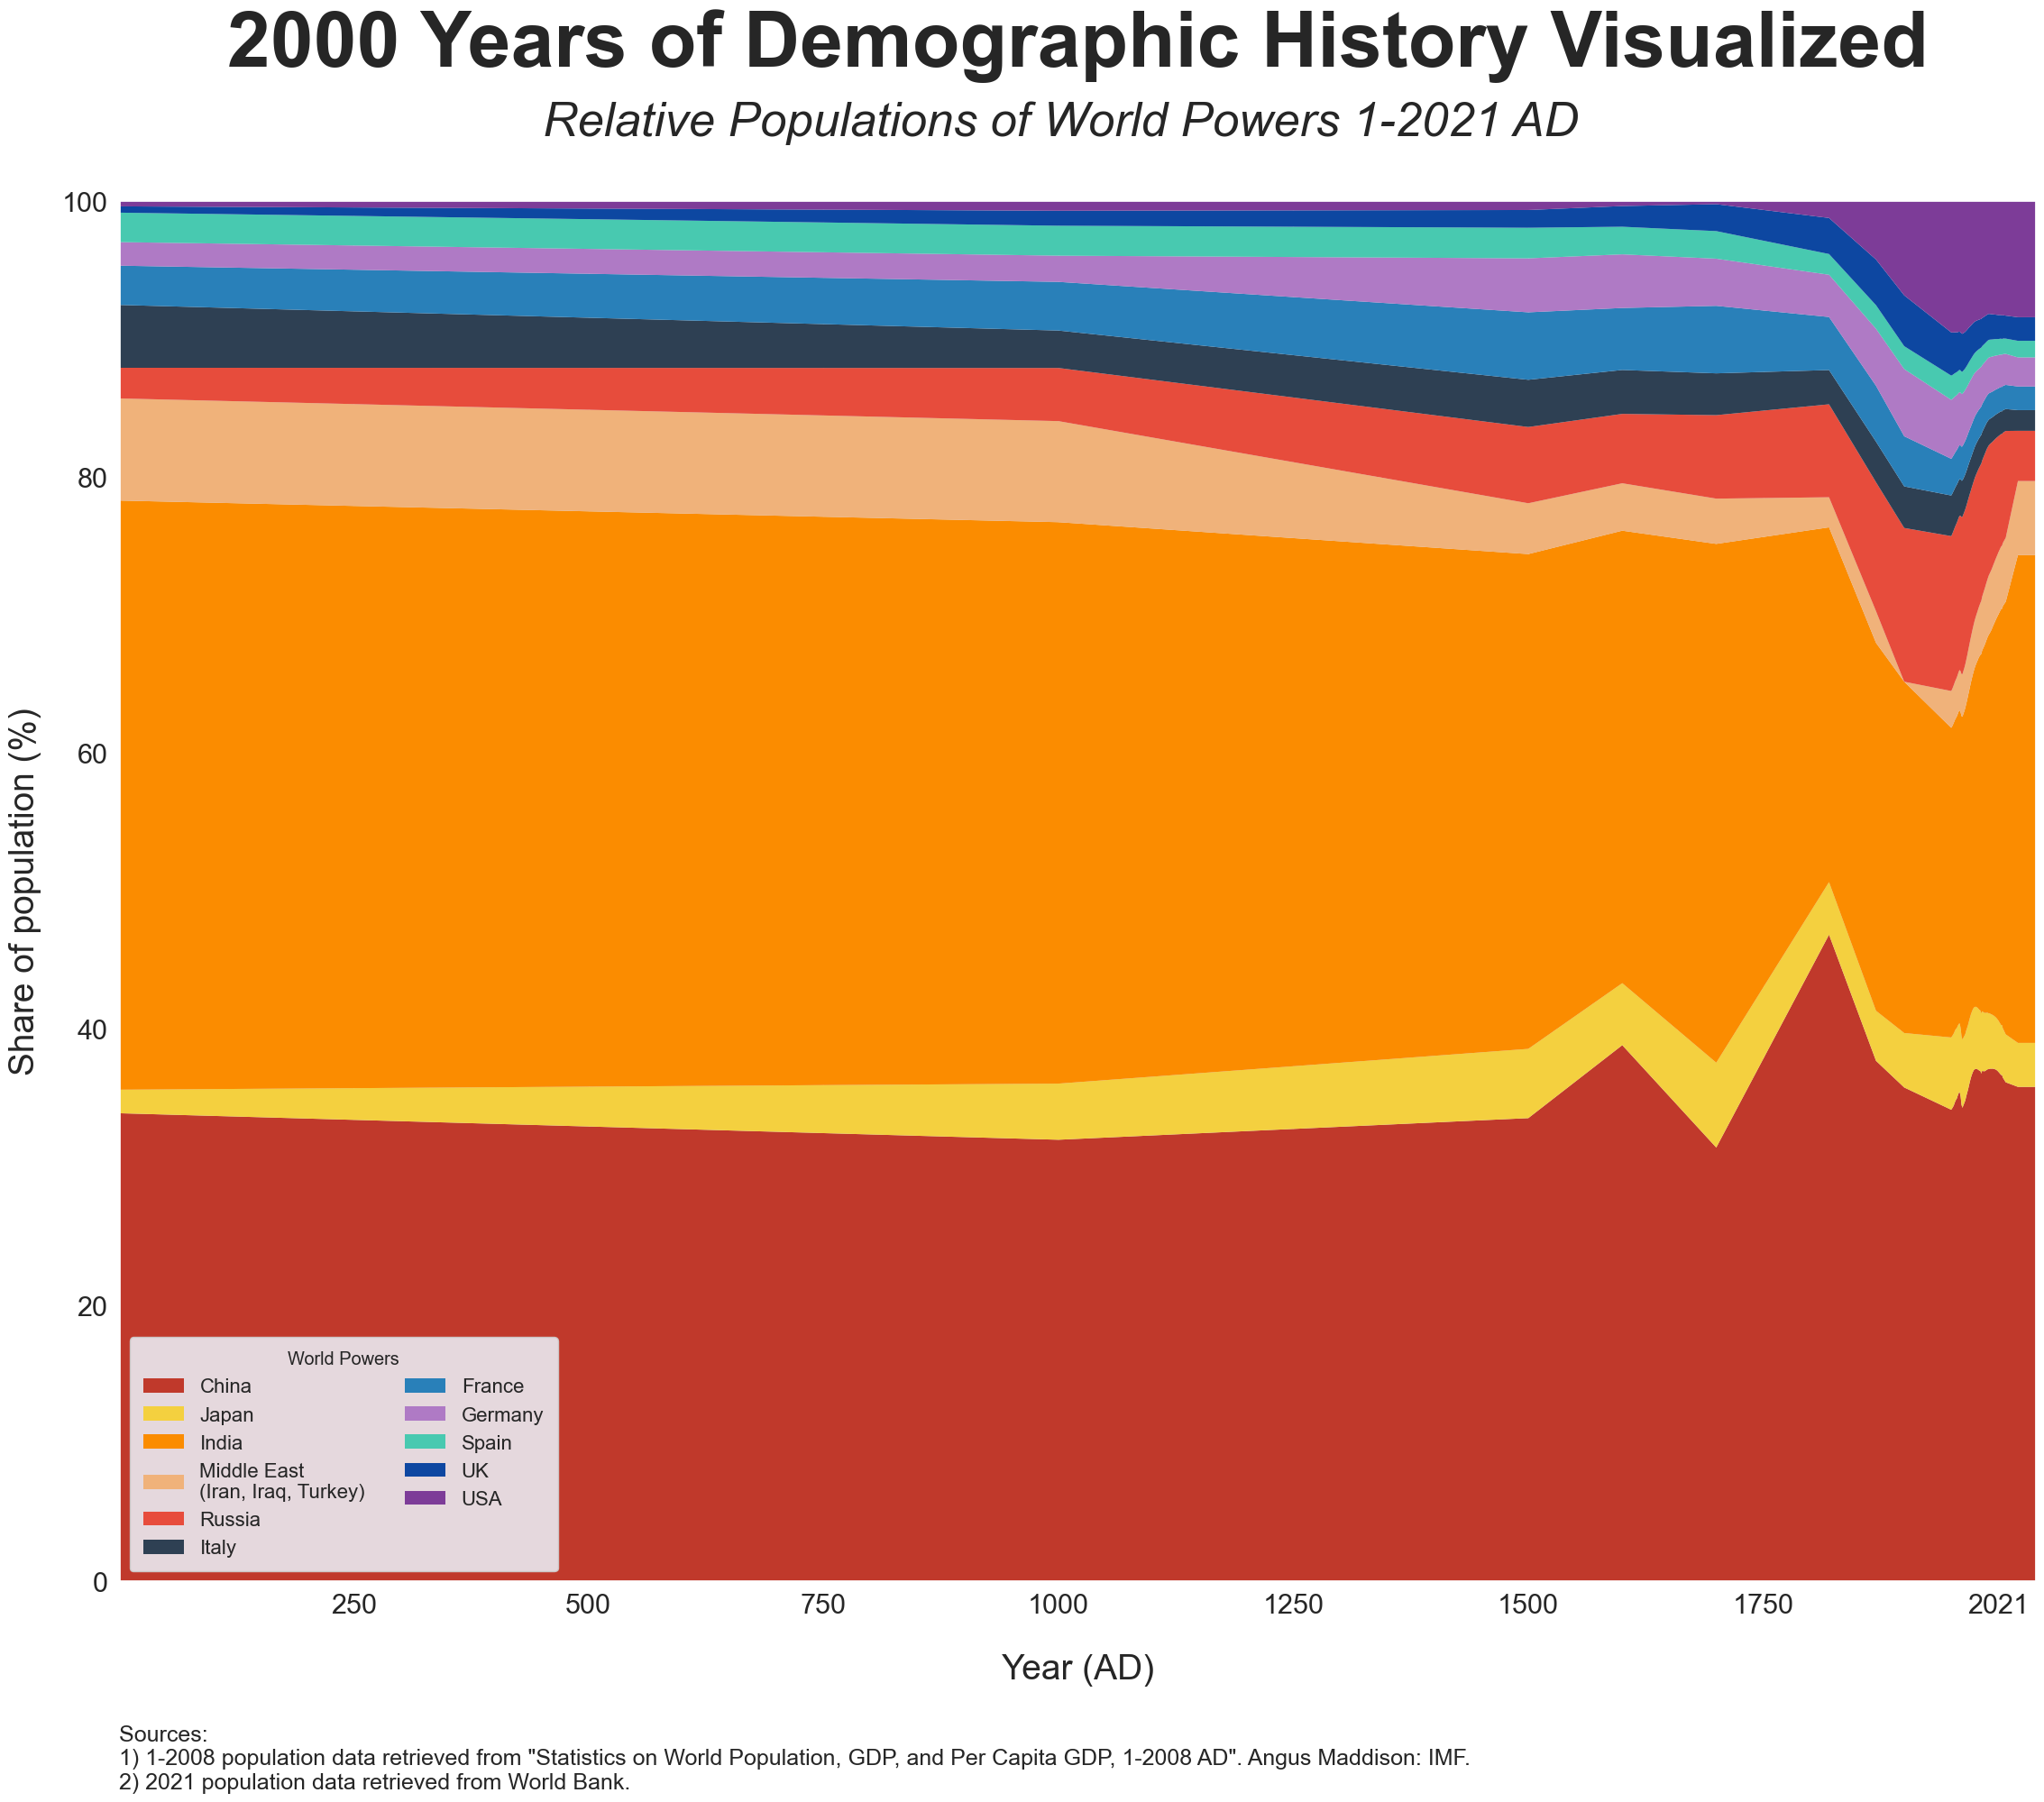

In [63]:
plt.stackplot(df.index, df[countries].T.astype(float),labels=countries_labels, edgecolor='none')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.xlabel("Year (AD)", fontsize=28,labelpad=28, fontweight='roman')
plt.ylabel("Share of population (%)", labelpad=16, fontsize=28, fontweight='roman')
plt.xticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000], [250, 500, 750, 1000, 1250, 1500, 1750, 2021], fontsize=22)
plt.yticks(fontsize=22)
plt.title("2000 Years of Demographic History Visualized", fontsize=62, fontweight='semibold', pad=108)
plt.suptitle('Relative Populations of World Powers 1-2021 AD', fontsize=38, y= 1.055, style='italic')
plt.legend(loc='lower left', prop={'size': 16}, ncol=2, borderpad=0.7, framealpha=0.90, title="World Powers", title_fontsize='large')
plt.text(0, -15, "Sources: \n1) 1-2008 population data retrieved from \"Statistics on World Population, GDP, and Per Capita GDP, 1-2008 AD\". Angus Maddison: IMF.\n2) 2021 population data retrieved from World Bank.", fontsize=18)
plt.savefig('relative_population_1-2000.png', bbox_inches='tight', pad_inches=0.8)
plt.show()

In [64]:
# plt.stackplot(df.index, df[countries].T.astype(float),labels=countries_labels, edgecolor='none')
# plt.margins(x=0, y=0)
# plt.xlabel("Year (AD)", fontsize=28,labelpad=28, fontweight='roman')
# plt.ylabel("Share of population (%)", labelpad=16, fontsize=28, fontweight='roman')
# plt.xticks([250, 500, 750, 1000, 1250, 1500, 1750, 2000], [250, 500, 750, 1000, 1250, 1500, 1750, 2021], fontsize=22)
# plt.yticks(fontsize=22)
# plt.savefig('relative_population_1-2000.png', bbox_inches='tight', pad_inches=0.8)
# plt.show()